### EDA ###

- For Frame of Reference:
| Year   |      Start of DST      |  End of DST |
|----------|:-------------:|------:|
| 2016 | March 13 | November 6 |
| 2017 | March 12 | November 5 |
| 2018 | March 11 | November 4 |
| 2019 | March 10 | November 3 |
| 2020 | March 8 | November 2 |

**Imports**

In [116]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")

import matplotlib.pyplot as plt
import datetime as dt

### Chicago ###

**Reading In Data**

In [2]:
#original data:
chi_df_og = pd.read_csv('../data/chi_accidents.csv')

In [3]:
chi_df_og.head(3)

id  severity           start_time             end_time  start_lat  \
0  A-2749141         2  2016-11-30 14:46:48  2016-11-30 20:46:48  42.305960   
1  A-2749152         2  2016-11-30 14:58:59  2016-11-30 20:58:59  42.175870   
2  A-2749158         3  2016-11-30 15:14:24  2016-11-30 21:29:48  42.175897   

   start_lng    end_lat    end_lng  distance(mi)  \
0 -87.960150  42.306916 -87.960918         0.077   
1 -88.135770  42.174620 -88.135794         0.086   
2 -88.135769  42.174612 -88.135794         0.089   

                                         description   number  \
0  Between IL-137/Buckley Rd/Peterson Rd and IL-1...      NaN   
1                 At US-14/Northwest Hwy - Accident.  21500.0   
2  Between IL-22 and US-14/Northwest Hwy - Accident.  21501.0   

            street side          city county state     zipcode country  \
0  N Milwaukee Ave    R  Libertyville   Lake    IL       60048      US   
1    N IL Route 59    L    Barrington   Lake    IL  60010-2457      US   
2    N IL Route 59    R    Barrington   Lake    IL  60010-2456      US   

     timezone airport_code    weather_timestamp  temperature(f)  \
0  US/Central         KUGN  2016-11-30 14:55:00            37.0   
1  US/Central         KPWK  2016-11-30 14:52:00            37.0   
2  US/Central         KPWK  2016-11-30 14:52:00            37.0   

   wind_chill(f)  humidity(%)  pressure(in)  visibility(mi) wind_direction  \
0           31.0         79.0         29.59            10.0           West   
1           28.1         76.0         29.62            10.0           West   
2           28.1         76.0         29.62            10.0           West   

   wind_speed(mph)  precipitation(in) weather_condition  amenity   bump  \
0              8.1                NaN          Overcast    False  False   
1             15.0                NaN          Overcast    False  False   
2             15.0                NaN          Overcast    False  False   

   crossing  give_way  junction  no_exit  railway  roundabout  station   stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   

   traffic_calming  traffic_signal  turning_loop sunrise_sunset  \
0            False            True         False            Day   
1            False            True         False            Day   
2            False            True         False            Day   

  civil_twilight nautical_twilight astronomical_twilight  
0            Day               Day                   Day  
1            Day               Day                   Day  
2            Day               Day                   Day

In [4]:
chi_df_og.shape

(42472, 47)

In [5]:
chi_df_og.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [6]:
#cleaned data:
chi_df = pd.read_csv('../data/chi_df_cleaned.csv')

In [7]:
chi_df.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  42.305960 -87.960150  42.306916 -87.960918         0.077   
1         2  42.175870 -88.135770  42.174620 -88.135794         0.086   
2         3  42.175897 -88.135769  42.174612 -88.135794         0.089   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  year  month  week  start_time_ep  \
0               1             0  2016     11    48   1.480517e+09   
1               1             0  2016     11    48   1.480518e+09   
2               1             0  2016     11    48   1.480519e+09   

    end_time_ep  weather_timestamp_ep  accident_duration  side_R  side_nan  \
0  1.480539e+09          1.480518e+09            21600.0       1         0   
1  1.480540e+09          1.480518e+09            21600.0       0         0   
2  1.480541e+09          1.480518e+09            22524.0       1         0   

   wind_direction_Calm  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_East  wind_direction_N  \
0                   0                    0                 0   
1                   0                    0                 0   
2                   0                    0                 0   

   wind_direction_NE  wind_direction_NNE  wind_direction_NNW  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   

   wind_direction_NW  wind_direction_North  wind_direction_S  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   

   wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   

   wind_direction_SW  wind_direction_South  wind_direction_VAR  \
0                  0                     0                   0   
1                  0                     0                   0   
2                  0                     0                   0   

   wind_direction_Variable  wind_direction_W  wind_direction_WNW  \
0                        0                 0                   0   
1                        0                 0                   0   
2                        0                 0                   0   

   wind_direction_WSW  wind_direction_West  wind_direction_nan  \
0                   0                    1                   0   
1                   0                    1                   0   
2                   0                    1                   0   

   weather_condition_Clear  weather_condition_Cloudy  \
0                        0                   

In [8]:
chi_df.shape

(40974, 155)

In [9]:
chi_df.columns[:40]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'year', 'month',
       'week', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep',
       'accident_duration', 'side_R', 'side_nan', 'wind_direction_Calm',
       'wind_direction_E', 'wind_direction_ENE', 'wind_direction_ESE',
       'wind_direction_East'],
      dtype='object')

### EDA ###

**Visualizations of Original Data**

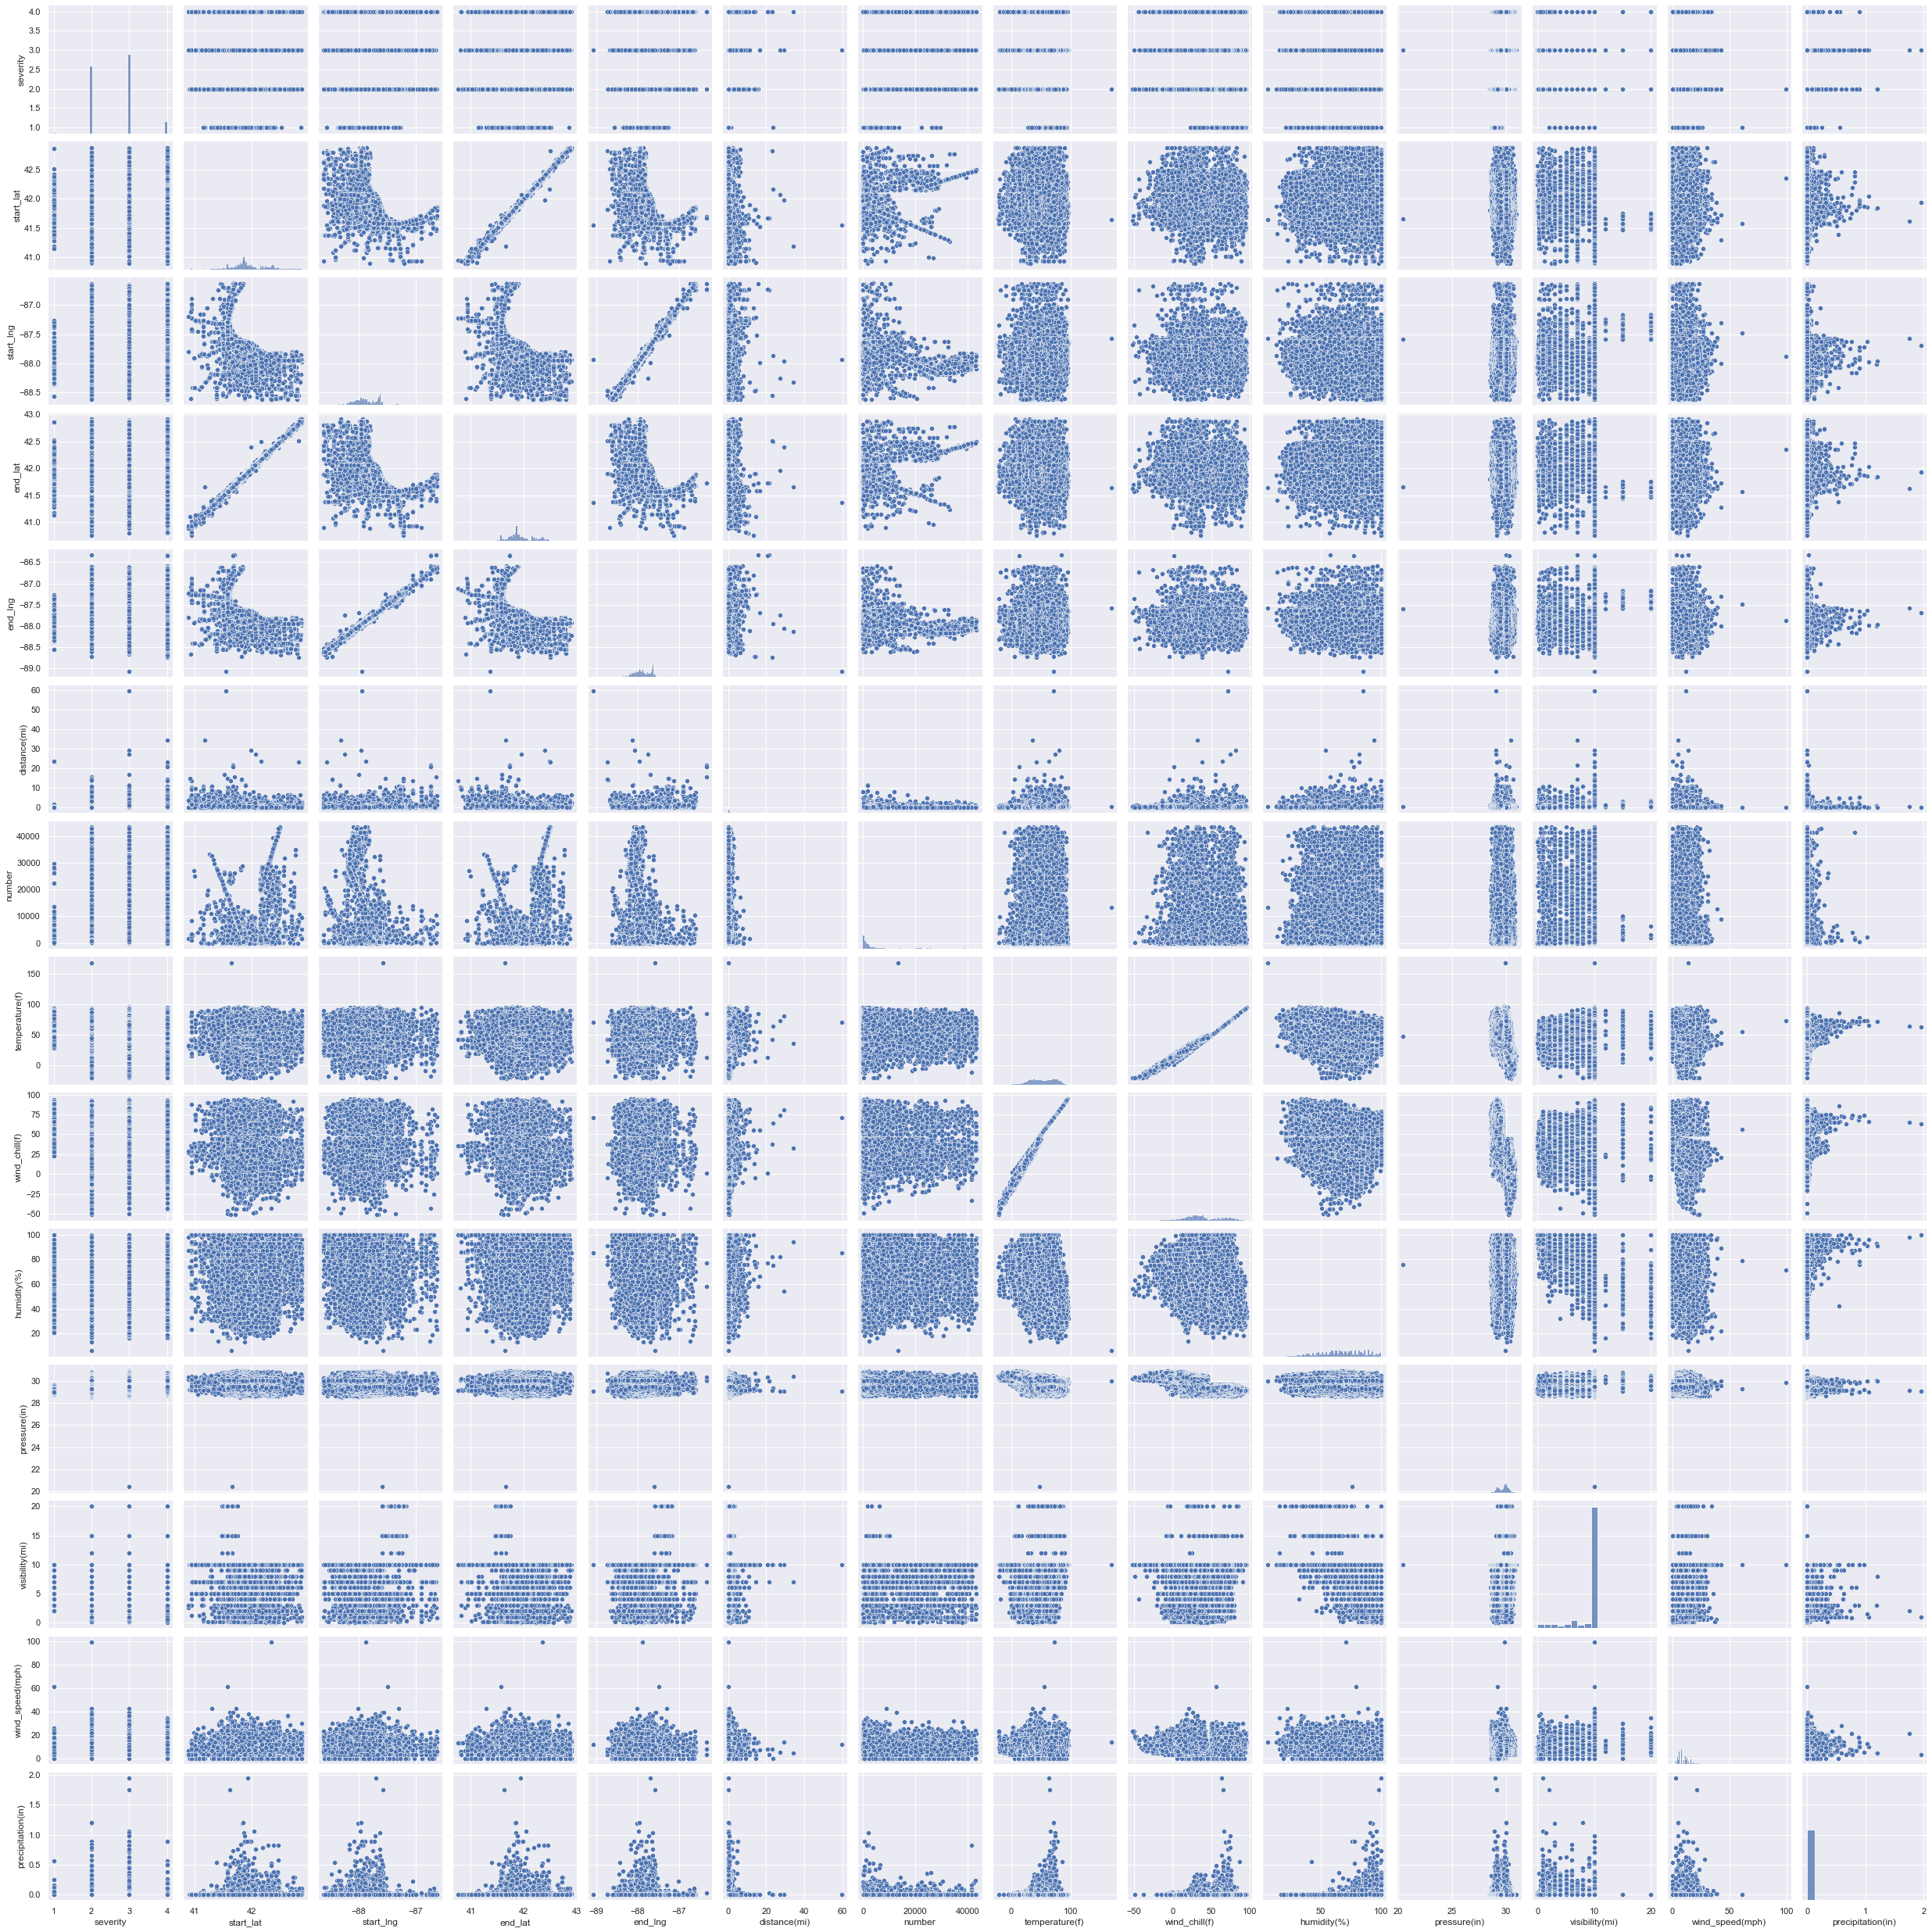

In [10]:
sns.pairplot(chi_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']]);

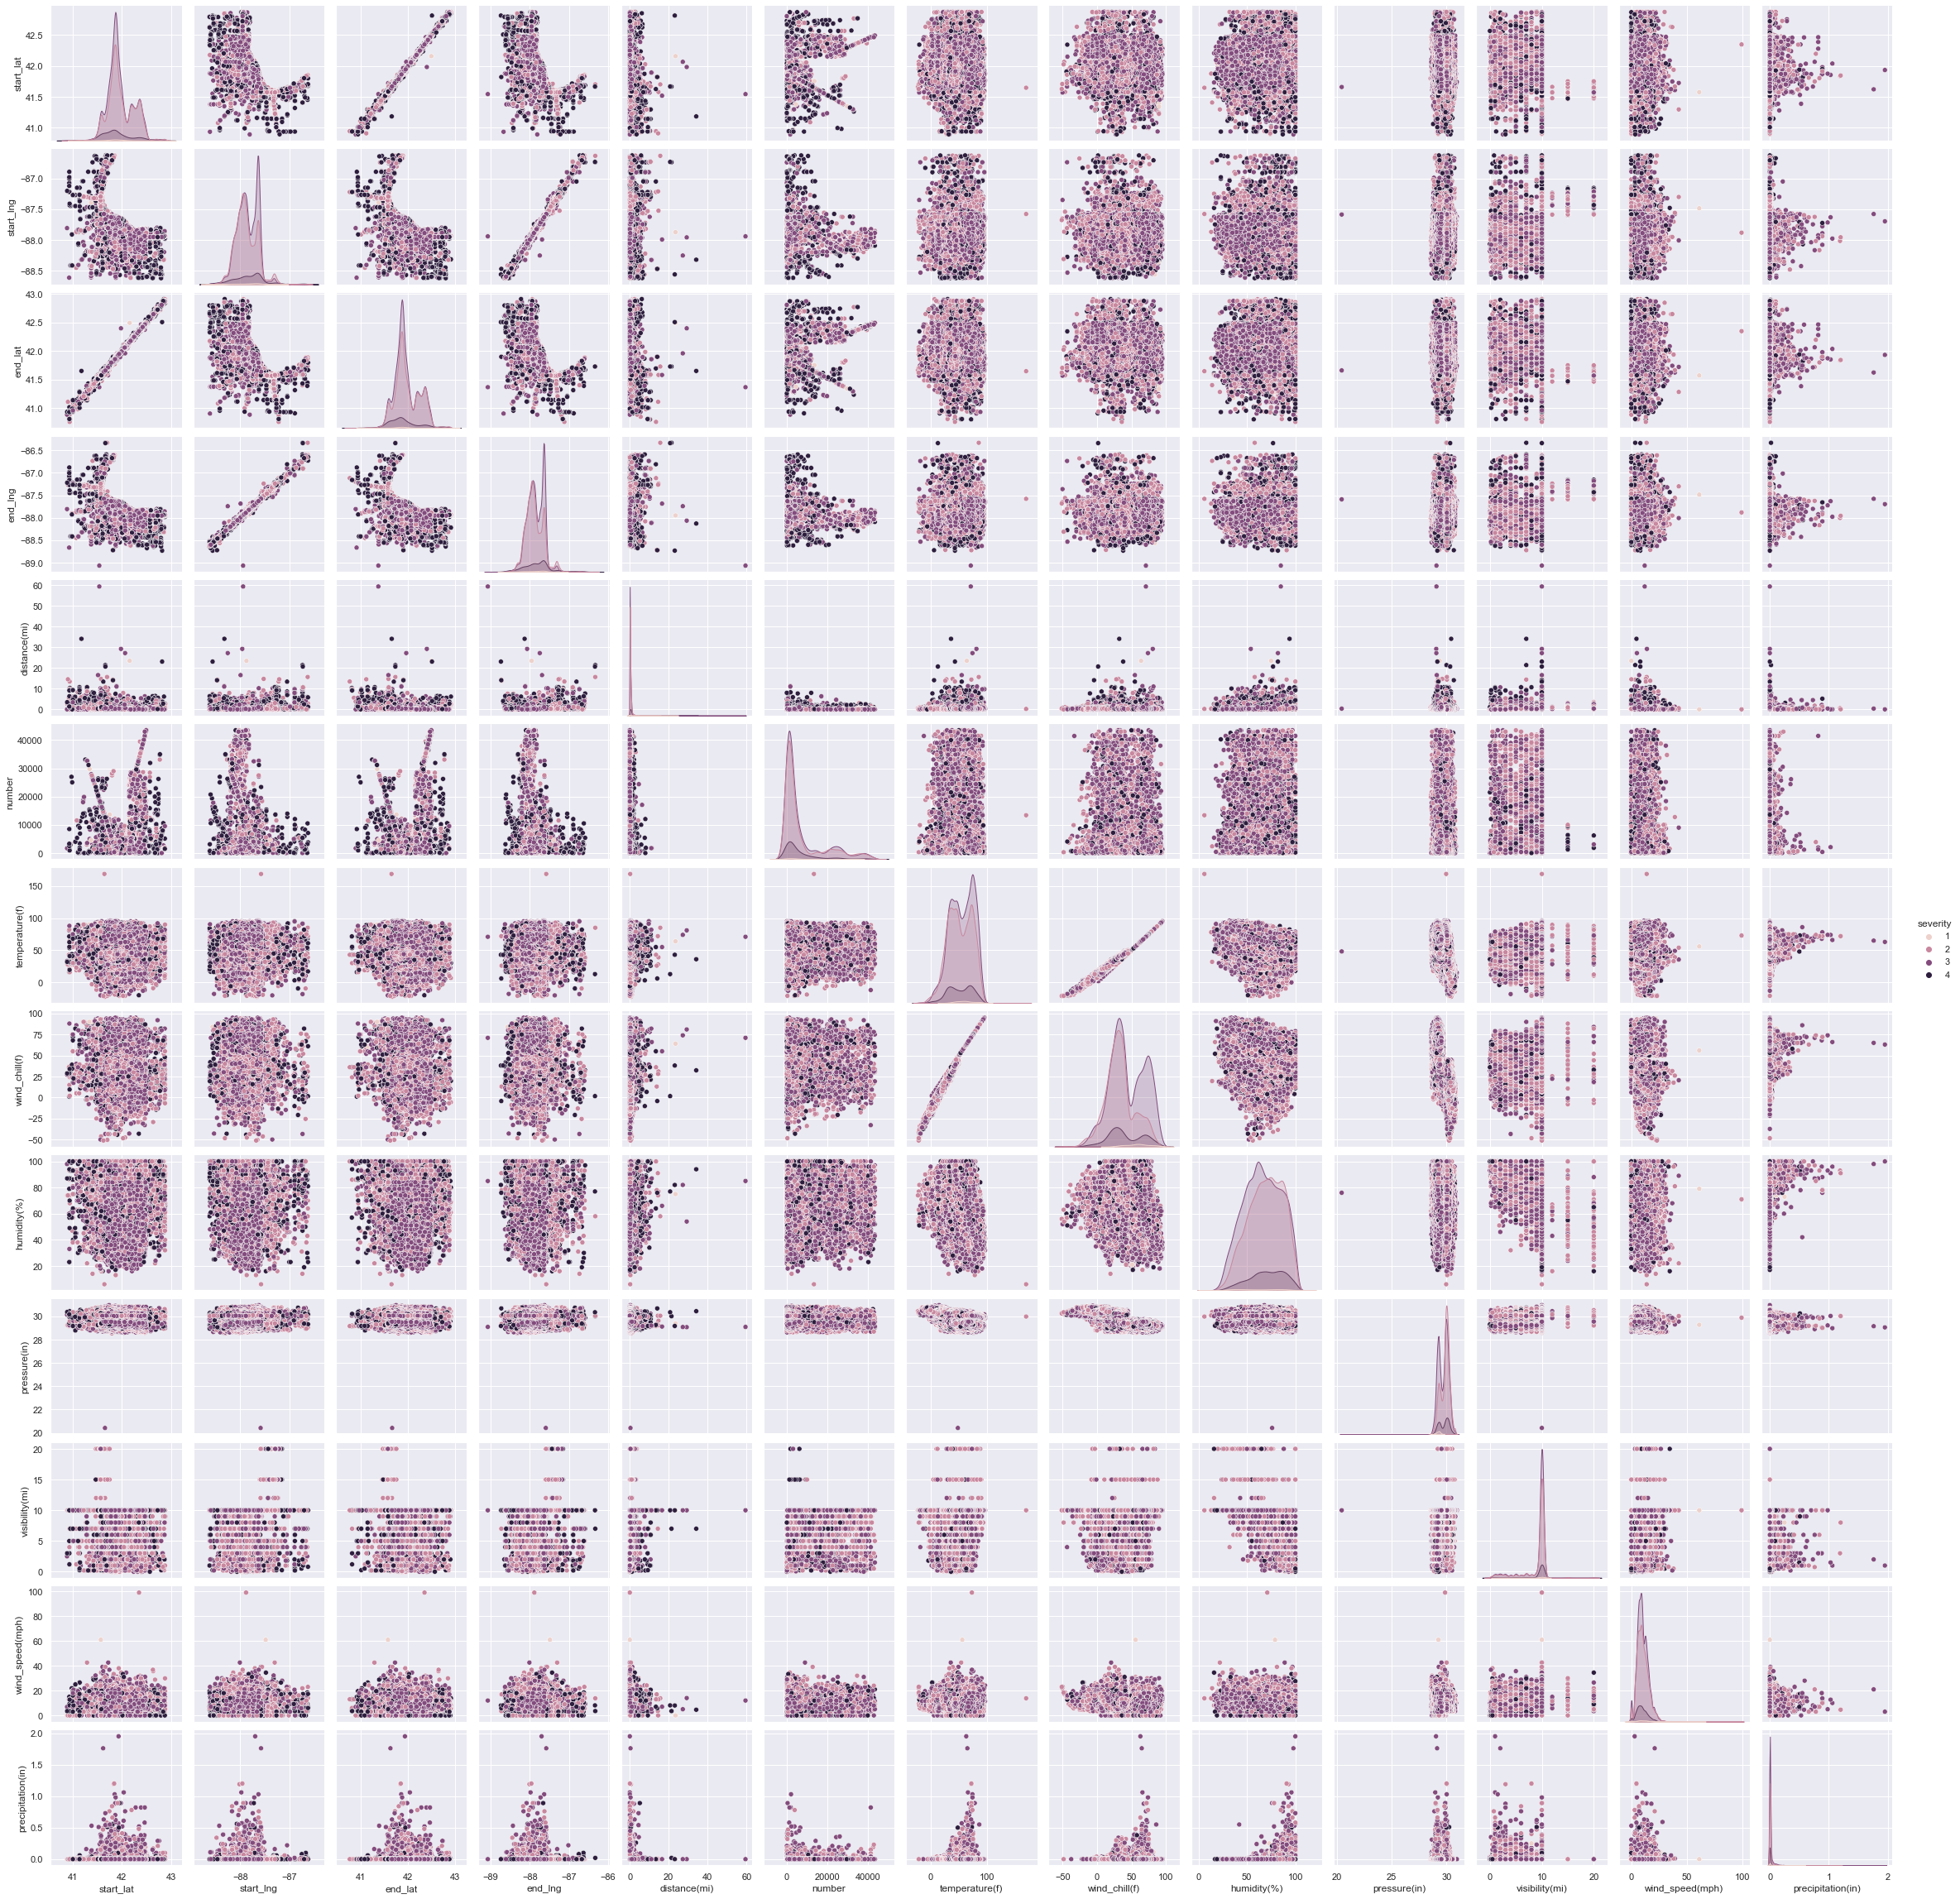

In [11]:
sns.pairplot(chi_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']], hue = 'severity');

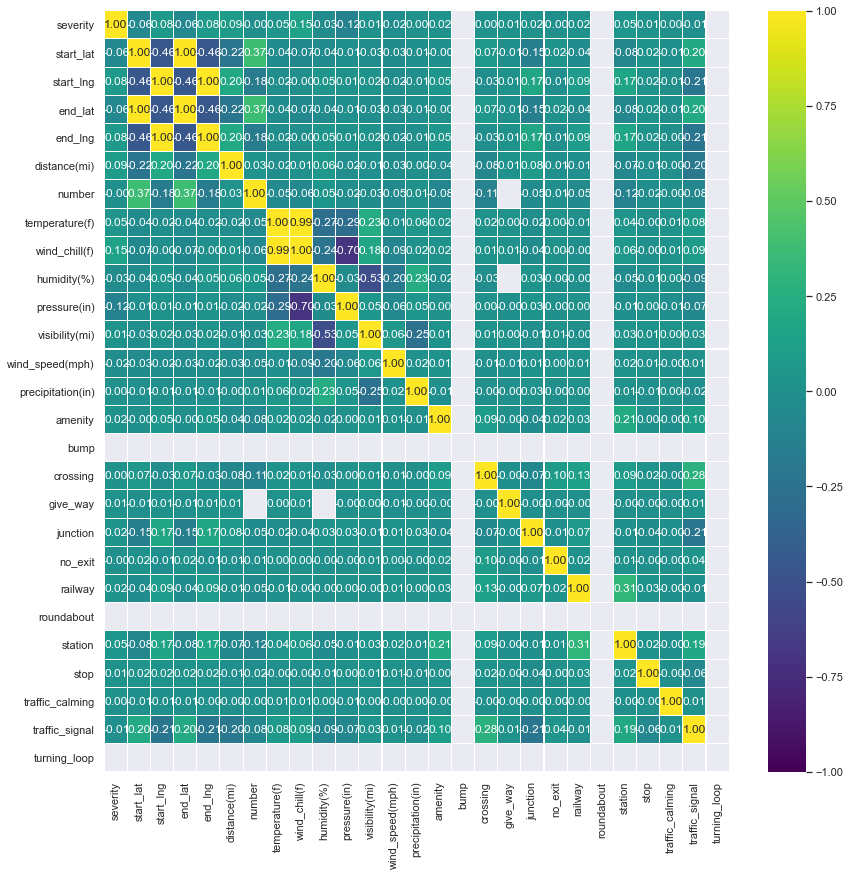

In [12]:
plt.figure(figsize = (14, 14))
sns.heatmap(chi_df_og.corr(),
            annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

**Exploring Cleaned Data**

In [13]:
chi_df.shape

(40974, 155)

In [20]:
chi_df[['severity', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep', 
        'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration']].describe().drop('count').T

mean           std           min           25%  \
severity              2.649192e+00  6.225430e-01  1.000000e+00  2.000000e+00   
start_time_ep         1.531392e+09  4.411057e+07  1.466174e+09  1.489386e+09   
end_time_ep           1.531407e+09  4.410178e+07  1.466196e+09  1.489407e+09   
weather_timestamp_ep  1.531392e+09  4.411055e+07  1.466175e+09  1.489385e+09   
start_lat             4.195990e+01  2.682546e-01  4.088821e+01  4.179762e+01   
start_lng            -8.786151e+01  2.323141e-01 -8.862312e+01 -8.801885e+01   
end_lat               4.195995e+01  2.684129e-01  4.076210e+01  4.179862e+01   
end_lng              -8.786134e+01  2.327293e-01 -8.906718e+01 -8.801898e+01   
distance(mi)          3.509653e-01  8.422718e-01  0.000000e+00  0.000000e+00   
temperature(f)        5.303954e+01  2.123214e+01 -2.240000e+01  3.650000e+01   
wind_chill(f)         4.992993e+01  2.500837e+01 -5.130000e+01  3.030000e+01   
humidity(%)           6.743755e+01  1.847479e+01  6.000000e+00  5.400000e+01   
pressure(in)          2.977027e+01  4.384098e-01  2.041000e+01  2.937000e+01   
visibility(mi)        8.889359e+00  2.537189e+00  0.000000e+00  1.000000e+01   
wind_speed(mph)       9.995558e+00  4.829860e+00  0.000000e+00  6.900000e+00   
precipitation(in)     5.391224e-03  3.824892e-02  0.000000e+00  0.000000e+00   
accident_duration     1.417851e+04  8.494317e+04  8.080000e+02  1.780000e+03   

                               50%           75%           max  
severity              3.000000e+00  3.000000e+00  4.000000e+00  
start_time_ep         1.527679e+09  1.575620e+09  1.609452e+09  
end_time_ep           1.527701e+09  1.575621e+09  1.609458e+09  
weather_timestamp_ep  1.527679e+09  1.575621e+09  1.609452e+09  
start_lat             4.189260e+01  4.216155e+01  4.288156e+01  
start_lng            -8.788053e+01 -8.767468e+01 -8.662489e+01  
end_lat               4.189229e+01  4.216155e+01  4.291007e+01  
end_lng              -8.788024e+01 -8.767429e+01 -8.633062e+01  
distance(mi)          1.270000e-01  4.220000e-01  5.946600e+01  
temperature(f)        5.310000e+01  7.110000e+01  1.688000e+02  
wind_chill(f)         5.310000e+01  7.110000e+01  1.688000e+02  
humidity(%)           6.800000e+01  8.200000e+01  1.000000e+02  
pressure(in)          2.988000e+01  3.010000e+01  3.096000e+01  
visibility(mi)        1.000000e+01  1.000000e+01  2.000000e+01  
wind_speed(mph)       9.200000e+00  1.270000e+01  9.900000e+01  
precipitation(in)     0.000000e+00  0.000000e+00  1.950000e+00  
accident_duration     2.160000e+04  2.160000e+04  1.144740e+07

In [21]:
#ease of reference:
#| 2016 | March 13 | November 6 |
#| 2017 | March 12 | November 5 |
#| 2018 | March 11 | November 4 |
#| 2019 | March 10 | November 3 |
#| 2020 | March 8 | November 2 |

In [22]:
chi_df.columns[:40]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'year', 'month',
       'week', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep',
       'accident_duration', 'side_R', 'side_nan', 'wind_direction_Calm',
       'wind_direction_E', 'wind_direction_ENE', 'wind_direction_ESE',
       'wind_direction_East'],
      dtype='object')

In [98]:
chi_df['severity'].value_counts(normalize = True).sort_index()

1    0.006077
2    0.412481
3    0.507615
4    0.073827
Name: severity, dtype: float64

Exploring the frequency of accidents:

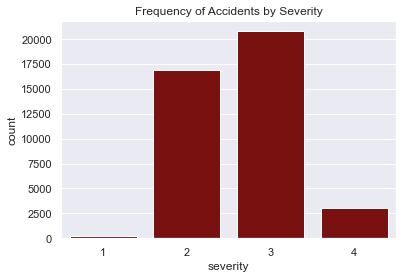

In [23]:
sns.countplot(data = chi_df, x = "severity", color = "darkred", label = "Accidents")

plt.title('Frequency of Accidents by Severity')
plt.show()
#are '1' severity accidents under reported?

#remember severity is: a number between 1 and 4,
#where 1 indicates the least impact on traffic 
#(i.e., short delay as a result of the accident) and
#4 indicates a significant impact on traffic (i.e., long delay).	

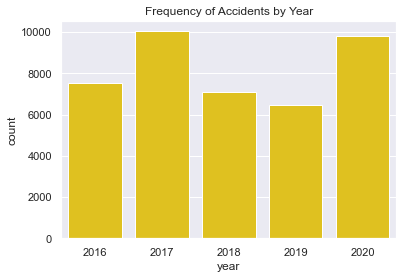

In [24]:
sns.countplot(data = chi_df, x = "year", color = "gold", label = "Accidents")

plt.title('Frequency of Accidents by Year')
plt.show()

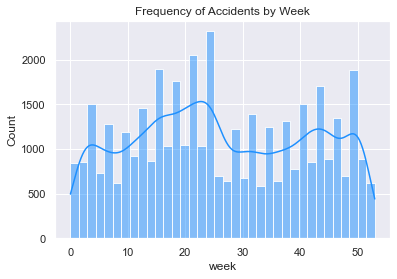

In [25]:
sns.histplot(data = chi_df, x = "week", color = "dodgerblue", label = "Accidents", kde=True)

plt.title('Frequency of Accidents by Week')
plt.show()
#could the drop around weeks 27, 28 be attributed to the 4th of July holiday?

In [26]:
chi_df['temperature(f)']

0        37.0
1        37.0
2        37.0
3        37.0
4        37.9
         ... 
40969    71.0
40970    68.0
40971    66.0
40972    65.0
40973    67.0
Name: temperature(f), Length: 40974, dtype: float64

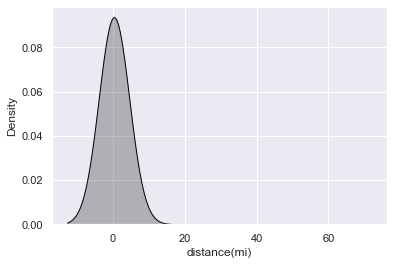

In [61]:
#https://www.python-graph-gallery.com/74-density-plot-of-several-variables
fig = sns.kdeplot(chi_df['distance(mi)'], shade=True, bw_method = 5, bw_adjust = 1, color= "black")
plt.show()

In [62]:
chi_df['distance(mi)'].min()

0.0

Looking at weather variables:

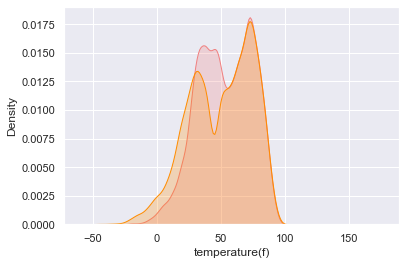

In [35]:
#https://www.python-graph-gallery.com/74-density-plot-of-several-variables
fig = sns.kdeplot(chi_df['temperature(f)'], shade=True, color= "lightcoral")
fig = sns.kdeplot(chi_df['wind_chill(f)'], shade=True, color= "darkorange")
plt.show()

In [33]:
#DELETE DELETE DELETE

#for ease of reference:
chi_df.columns[:40]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'year', 'month',
       'week', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep',
       'accident_duration', 'side_R', 'side_nan', 'wind_direction_Calm',
       'wind_direction_E', 'wind_direction_ENE', 'wind_direction_ESE',
       'wind_direction_East'],
      dtype='object')

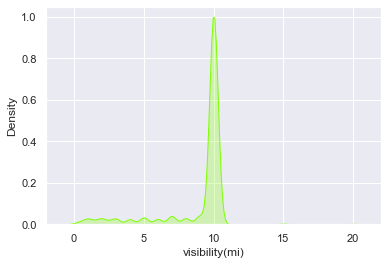

In [65]:
fig = sns.kdeplot(chi_df['visibility(mi)'], shade=True, color= "chartreuse")
plt.show()

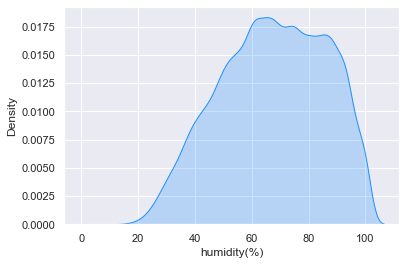

In [64]:
fig = sns.kdeplot(chi_df['humidity(%)'], shade=True, color= "dodgerblue")
plt.show()

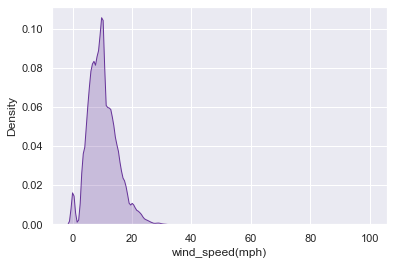

In [66]:
fig = sns.kdeplot(chi_df['wind_speed(mph)'], shade=True, color= "rebeccapurple")
plt.show()

Trying to plot the 'shape' of Chicago:

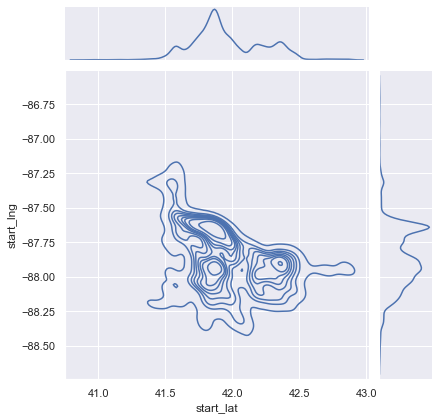

In [69]:
sns.jointplot(x=chi_df["start_lat"], y=chi_df["start_lng"], kind='kde')
plt.show()

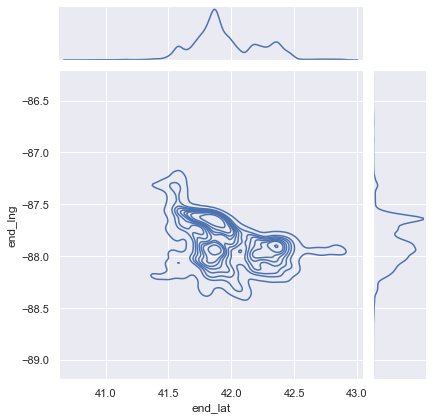

In [71]:
sns.jointplot(x=chi_df["end_lat"], y=chi_df["end_lng"], kind='kde')
plt.show()

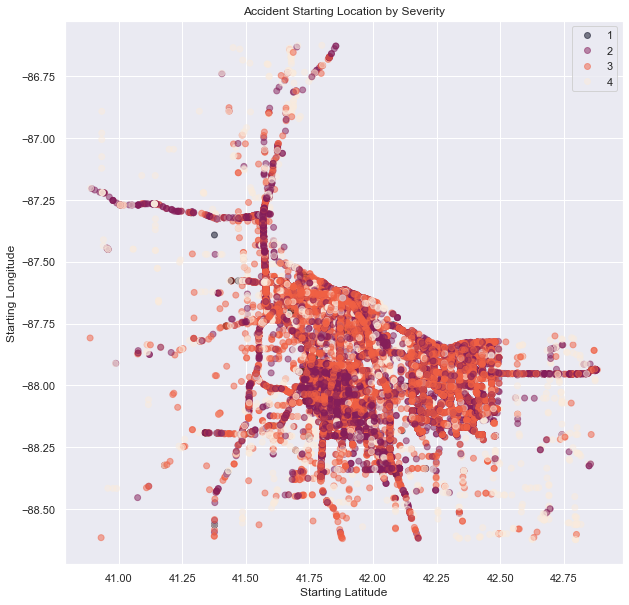

In [110]:
plt.figure(figsize=(10, 10))
plt.scatter(x = chi_df["start_lat"], y = chi_df["start_lng"], c = chi_df['severity'], alpha = 0.5)
plt.title('Accident Starting Location by Severity')
plt.xlabel('Starting Latitude')
plt.ylabel('Starting Longitude')
plt.legend(handles = scatter.legend_elements()[0], labels = [1, 2, 3, 4])
plt.show()

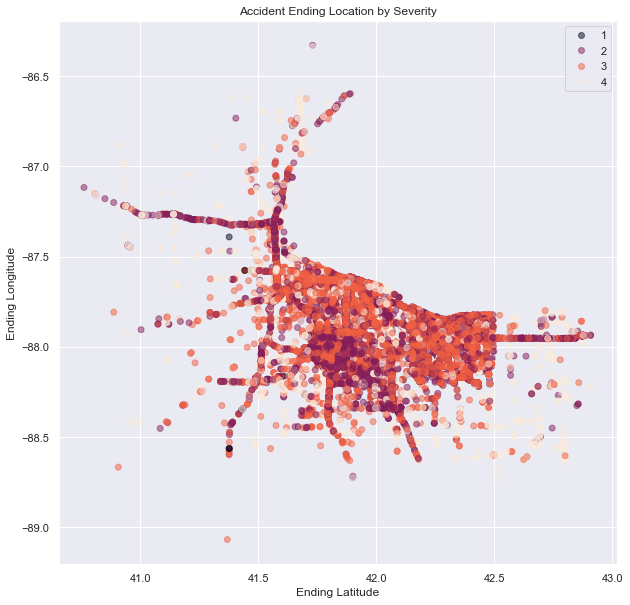

In [112]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x = chi_df["end_lat"], y = chi_df["end_lng"], c = chi_df['severity'], alpha = 0.5)
plt.title('Accident Ending Location by Severity')
plt.xlabel('Ending Latitude')
plt.ylabel('Ending Longitude')
plt.legend(handles = scatter.legend_elements()[0], labels = [1, 2, 3, 4])
plt.show()

Plotting time series:

- For Frame of Reference

| Human-readable Time |      Seconds      |
|----------|:-------------:|
| 1 hour | 3600 seconds |
| 1 day | 86400 seconds |
| 1 week | 604800 seconds |
| 1 month (30.44 days) | 2629743 seconds |
| 1 hour (365.24 days) | 31556926 seconds |

source: https://www.epochconverter.com/

In [145]:
chi_df['start_time_ep'] = pd.to_datetime(chi_df['start_time_ep'], unit='s')
chi_df.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  42.305960 -87.960150  42.306916 -87.960918         0.077   
1         2  42.175870 -88.135770  42.174620 -88.135794         0.086   
2         3  42.175897 -88.135769  42.174612 -88.135794         0.089   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  year  month  week       start_time_ep  \
0               1             0  2016     11    48 2016-11-30 14:46:48   
1               1             0  2016     11    48 2016-11-30 14:58:59   
2               1             0  2016     11    48 2016-11-30 15:14:24   

    end_time_ep  weather_timestamp_ep  accident_duration  side_R  side_nan  \
0  1.480539e+09          1.480518e+09            21600.0       1         0   
1  1.480540e+09          1.480518e+09            21600.0       0         0   
2  1.480541e+09          1.480518e+09            22524.0       1         0   

   wind_direction_Calm  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_East  wind_direction_N  \
0                   0                    0                 0   
1                   0                    0                 0   
2                   0                    0                 0   

   wind_direction_NE  wind_direction_NNE  wind_direction_NNW  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   

   wind_direction_NW  wind_direction_North  wind_direction_S  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   

   wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   

   wind_direction_SW  wind_direction_South  wind_direction_VAR  \
0                  0                     0                   0   
1                  0                     0                   0   
2                  0                     0                   0   

   wind_direction_Variable  wind_direction_W  wind_direction_WNW  \
0                        0                 0                   0   
1                        0                 0                   0   
2                        0                 0                   0   

   wind_direction_WSW  wind_direction_West  wind_direction_nan  \
0                   0                    1                   0   
1                   0                    1                   0   
2                   0                    1                   0   

   weather_condition_Clear  weather_condition_Cloudy  \
0                        

In [146]:
#SETTING ASIDE IN CASE I WANT TO USE

#MAYBE DELETE
#MAYBE DELETE
#MAYBE DELETE

chi_df_time_convert = pd.to_datetime(chi_df['start_time_ep'], unit='s')
chi_df_time_convert = pd.DataFrame(chi_df_time_convert)
chi_df_time_convert.head(3)

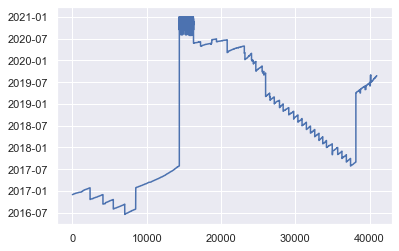

In [152]:
#https://www.python-graph-gallery.com/242-area-chart-and-faceting
plt.plot(chi_df_time_convert);